The dataset contains the transaction history of the 5 retail outlets of a company
The dataset has 6 columns:
1. RetailStore : The outlet number of the company
2. CustomerID : The ID of the customer who has made the purchase
3. TransactionID : The transaction ID
4. TransactionTime : The time at which the  transaction took place
5. ProductID : The product ID 
6. Cost : Cost of a unit of the product

I have attempted to extract the folllowing details from this dataset
1. Revenue collected per year
2. Revenue collected per month
3. Number of purchases made from each Retail outlet
4. Revenue collected based on day of the week
5. Most expensive product and it’s price
6. Least expensive product and it’s price
7. The oldest transaction
8. Most recent transaction
9. Top 10 trending products
10. Products that are struggling in the market
11. Performance of outlets based on the number of products sold
12. Performance of outlets based on the revenue generated



In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
#Reading the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Retail_trans_data.csv")

In [3]:
#First 5 entries of the data set
#The function head(n) returns the first n rows
df.head(5)

,RetailStore,CustomerID,TransactionID,TransactionTime,ProductID,Cost
0,1,1001,1ID10051,1/1/2011,1,144.75
1,2,1002,2ID10052,1/1/2011,2,97.25
2,2,1002,2ID10052,1/1/2011,3,47.25
3,2,1002,2ID10052,1/1/2011,4,197.25
4,3,1003,3ID10053,1/1/2011,5,216.00


In [4]:
#Last 5 entries of the data set
#The function tail(n) returns the last n rows
df.tail(5)

,RetailStore,CustomerID,TransactionID,TransactionTime,ProductID,Cost
56793,2,10272,2ID31814,3/24/2012,25,207.25
56794,5,11329,5ID31815,3/24/2012,26,274.50
56795,1,10469,1ID31816,3/24/2012,8,207.00
56796,5,11372,5ID31817,3/24/2012,31,1074.75
56797,5,11372,5ID31817,3/24/2012,31,1074.75


In [5]:
#DataFrame.describe(percentiles=None, include=None, exclude=None)
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,RetailStore,CustomerID,ProductID,Cost
count,56798.000000,56798.000000,56798.000000,56798.000000
mean,3.146766,5649.794465,22.501391,182.637368
std,1.397636,2903.974686,16.443369,116.831737
min,1.000000,1001.000000,1.000000,0.000000
25%,2.000000,3060.000000,9.000000,147.250000
50%,3.000000,5550.000000,20.000000,197.250000
75%,4.000000,8002.750000,32.000000,209.500000
max,5.000000,11372.000000,89.000000,1812.250000


In [6]:
#Checking the datatypes
df.dtypes

RetailStore          int64
CustomerID           int64
TransactionID       object
TransactionTime     object
ProductID            int64
Cost               float64
dtype: object

In [7]:
#Converting TransactionTime from type object to type datetime64
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])

In [8]:
#Extracting the Year and Month from the Transaction Time
df['Year'] = df['TransactionTime'].dt.year
df['Month'] = df['TransactionTime'].dt.month
#Extracting the day of the week
df['Day_of_week'] = df['TransactionTime'].dt.weekday

In [9]:
#A groupby operation involves some combination of splitting the object, applying a function, and combining the results. 
#This can be used to group large amounts of data and compute operations on these groups

#revenue per year
revenue_per_year = df.groupby(['Year']).sum()['Cost']
revenue_per_year

Year
2011    3612712.25
2012    6760725.00
Name: Cost, dtype: float64

Text(0.5,1,'Revenue collected per year')

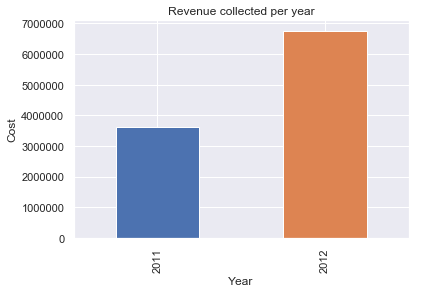

In [10]:
#Plotting the revenue per year using a bar graph
revenue_per_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Revenue collected per year')

It can be observed that the Revenue almost doubled in the year 2012 in comparison to the previous year

In [11]:
#Create a spreadsheet-style pivot table as a DataFrame.

#revenue per month
revenue_per_month = df.pivot_table(index='Month',values='Cost',aggfunc='sum')
revenue_per_month

,Cost
Month,
1,998950.50
2,1011785.25
3,1076082.75
4,940057.50
5,913122.00
6,814260.00
7,757383.75
8,800120.00
9,742421.25


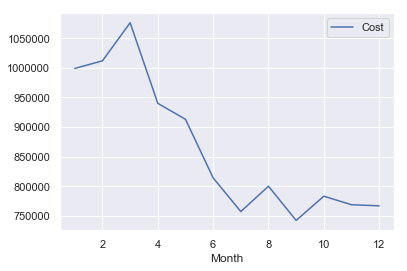

In [12]:
revenue_per_month.plot()

It can be observed that the revenue was maximum in the month of March. February also saw a high revenue. But after March there has been a drastic decline.


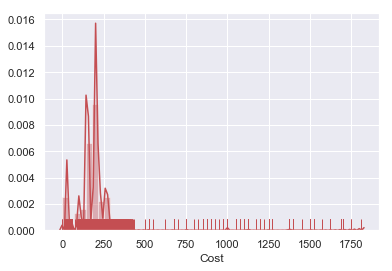

In [13]:
#Cost frequency
sns.distplot(df.Cost,bins=50,rug=True,color ='r')


4    13490
5    12490
2    11548
3     9977
1     9293
Name: RetailStore, dtype: int64


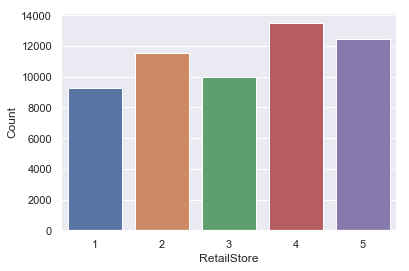

In [14]:
#Retail stores from which the products where purchased
a = df['RetailStore'].value_counts()
print(a)
af = a.to_frame()
af['Count'] = af['RetailStore']
af.drop(columns='RetailStore')
af['RetailStore'] = list(af.index)
sns.barplot(x=af.RetailStore,y=af.Count)

Retail outlet no 4 has the maximum number of purchases
Retail outlet no 1 has minimum number of purchases

In [15]:
sizes = df.groupby('Day_of_week').count()['CustomerID']

[]

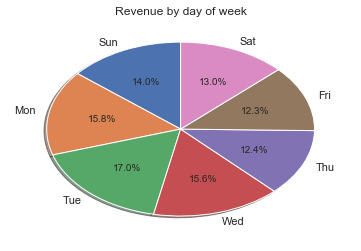

In [16]:
#Purchases based on the day of the week
labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Revenue by day of week')
plt.plot()

Tuesday saw the maximum generation of revenue while Friday had the least.

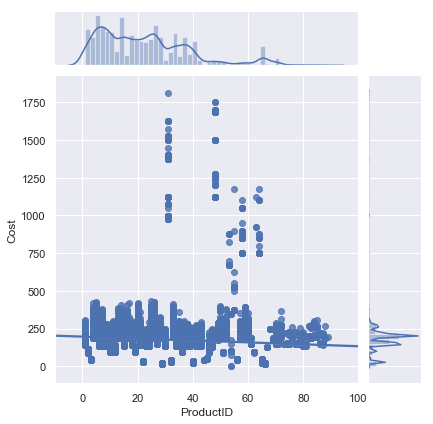

In [17]:
#Plot showing the prices of products purchased from the Retail Store
sns.jointplot(df['ProductID'],df['Cost'],kind='reg')


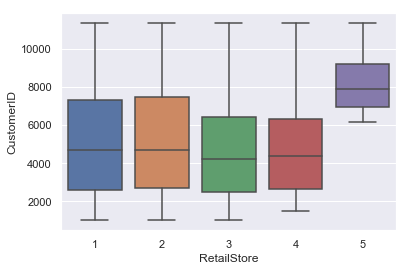

In [18]:
sns.boxplot(df['RetailStore'],df['CustomerID'])


In [22]:
#Most expensive product id and it's cost
ecost = df['Cost'].max()
eid = df[df['Cost'] == ecost]
print("Product ",eid['Cost'])

Product  12661    1812.25
Name: Cost, dtype: float64


In [23]:
#Least expensive product id and it's cost
lcost = df['Cost'].min()
lid = df[df['Cost'] == lcost]
print("Product ",lid['Cost'])

Product  15632    0.0
41878    0.0
Name: Cost, dtype: float64


So the most expensive product(s) is 12661(productid) priced at 1812.25
The least expensive product(s) is 15632 and 41878 priced at 0.0

In [24]:
#Oldest transaction
df['TransactionTime'].min()

Timestamp('2011-01-01 00:00:00')

In [25]:
#Most recent transaction
df['TransactionTime'].max()

Timestamp('2012-12-31 00:00:00')

In [26]:
#The retail store wants the list of Top 10 trending products
df.groupby('ProductID').count()['RetailStore'].sort_values(ascending=False).head(10)

ProductID
9     2864
5     2777
15    2736
1     2414
18    2375
37    2360
26    2282
11    2257
4     2122
23    1975
Name: RetailStore, dtype: int64

In [27]:
#The retail store wants the list of underperforming products to use strategies accordingly to boost sales
df.groupby('ProductID').count()['RetailStore'].sort_values().head(10)

ProductID
89     1
63     3
88     5
73     5
68     6
81     7
87     9
69     9
86    10
76    11
Name: RetailStore, dtype: int64

In [28]:
#Retail store outlets ranked in the order of no of products sold 
df.groupby('RetailStore').count()['ProductID'].sort_values(ascending=False)

RetailStore
4    13490
5    12490
2    11548
3     9977
1     9293
Name: ProductID, dtype: int64

In [29]:
#Retail store outlets ranked in the order of revenue generated
df.groupby('RetailStore').sum()['Cost'].sort_values(ascending=False)

RetailStore
2    2462940.50
4    2328376.50
5    2227462.25
3    1686689.75
1    1667968.25
Name: Cost, dtype: float64